Zadanie 3

In [1]:
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt

In [2]:
def autokowariancja(h, x):
    n = len(x)
    return 1/n * sum((x[i] - np.mean(x)) * (x[i + abs(h)] - np.mean(x)) for i in range(n-abs(h)))

In [3]:
def autokorelacja(h, x):
    return autokowariancja(h, x) / autokowariancja(0,x)

In [4]:
def autokowariancja_teo(h, x):
    if h == 0:
        return 4
    else:
        return 0

In [5]:
def autokorelacja_teo(h, x):
    if h == 0:
        return 1
    else:
        return 0

In [6]:
sample = np.random.normal(0, 2, 1000)

In [19]:
hs = np.arange(0, 10, 1)
ns = np.arange(30,2000,10)

In [8]:
autokow, autokor = [], []
autokow_teo, autokor_teo = [], []

In [9]:
for h in hs:
    autokow.append(autokowariancja(h, sample))
    autokor.append(autokorelacja(h, sample))
    autokow_teo.append(autokowariancja_teo(h, sample))
    autokor_teo.append(autokorelacja_teo(h, sample))

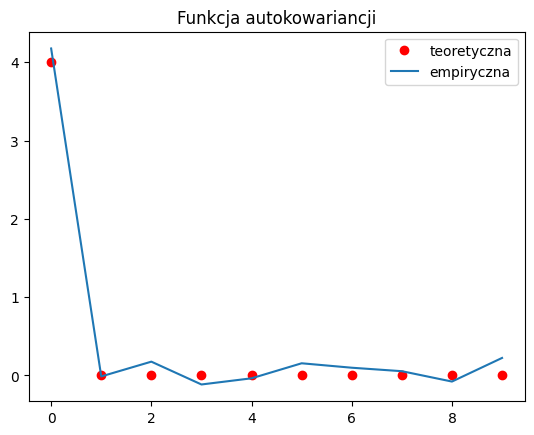

In [30]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()

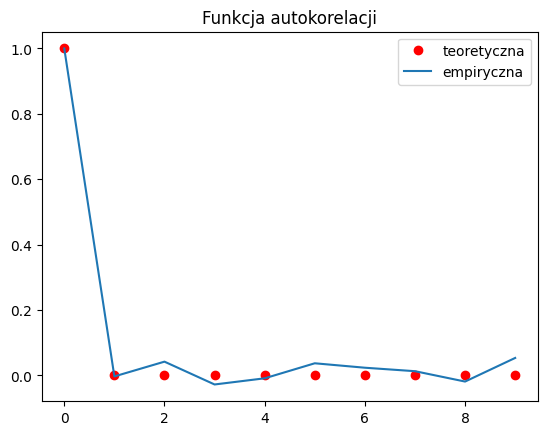

In [31]:
plt.plot(hs, autokor_teo, "ro", label="teoretyczna")
plt.plot(hs, autokor, label="empiryczna")
plt.title("Funkcja autokorelacji")
plt.legend(loc="best")
plt.show()

In [20]:
bledy_autokow, bledy_autokor = [], []
for n in ns:
    autokow, autokor = [], []
    autokow_teo, autokor_teo = [], []
    sample = np.random.normal(0, 2, n)
    bledy_n_autokow = 0
    bledy_n_autokor = 0
    for h in hs:
        teo_autokow = autokowariancja_teo(h, sample)
        teo_autokor = autokorelacja_teo(h, sample)
        emp_autokow = autokowariancja(h, sample)
        emp_autokor = autokorelacja(h, sample)
        autokow.append(emp_autokow)
        autokor.append(emp_autokor)
        autokow_teo.append(teo_autokow)
        autokor_teo.append(teo_autokor)
        bledy_n_autokow += abs(teo_autokow - emp_autokow)
        bledy_n_autokor += abs(teo_autokor - emp_autokor)
    bledy_autokor.append(bledy_n_autokor/10)
    bledy_autokow.append(bledy_n_autokow/10)

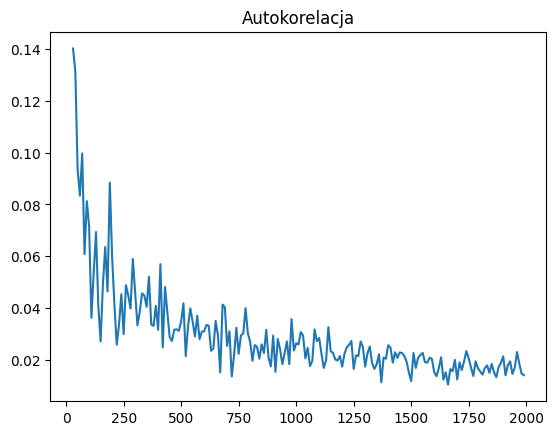

In [23]:
plt.plot(ns, bledy_autokor)
plt.title("Autokorelacja")
plt.show()

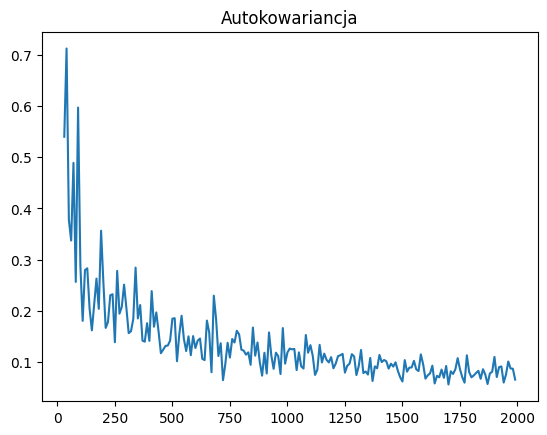

In [24]:
plt.plot(ns,bledy_autokow)
plt.title("Autokowariancja")
plt.show()

Zadanie 4


In [29]:
sigma = 1
theta = 0.5

In [30]:
def ma1_teo_acvf(h, sigma, theta):
    if h == 0:
        return sigma**2 * (1 + theta**2)
    elif h == -1 or h == 1:
        return theta * sigma**2
    else:
        return 0

In [31]:
def ma1_teo_acf(h, theta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return theta / (1 + theta**2)
    else:
        return 0

In [ ]:
def ma1_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [43]:
x = ma1_sample(1000, sigma, theta)

In [44]:
teo_acf, emp_acf, teo_acvf, emp_acvf = [], [], [], []
for h in hs:
    teo_acf.append(ma1_teo_acf(h, theta))
    emp_acf.append(autokorelacja(h, x))
    teo_acvf.append(ma1_teo_acvf(h, sigma, theta))
    emp_acvf.append(autokowariancja(h, x))

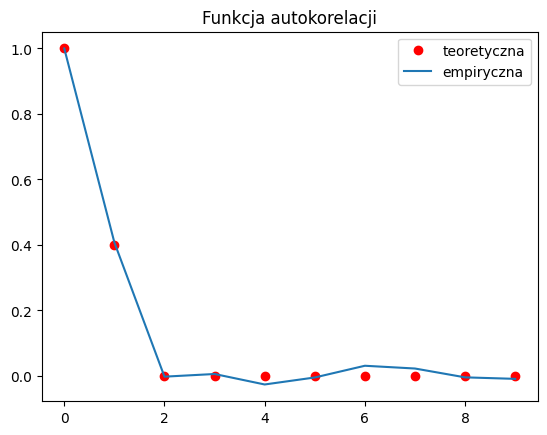

In [45]:
plt.plot(hs, teo_acf, "ro", label="teoretyczna")
plt.plot(hs, emp_acf, label="empiryczna")
plt.legend(loc="best")
plt.title("Funkcja autokorelacji")
plt.show()

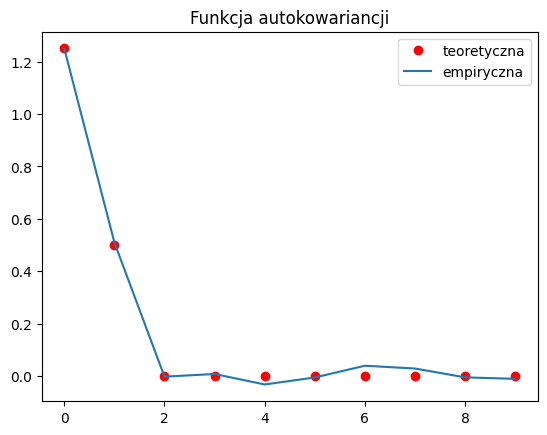

In [46]:
plt.plot(hs, teo_acvf, "ro", label="teoretyczna")
plt.plot(hs, emp_acvf, label="empiryczna")
plt.legend(loc="best")
plt.title("Funkcja autokowariancji")
plt.show()

Zadanie 5

In [60]:
def ma1_w_noise(n, sigma, theta, a, p):
    x = np.zeros(n)
    y = ma1_sample(n, sigma, theta)
    for i in range(n):
        prob = np.random.random()
        if prob < p/2:
            x[i] = y[i] + a
        elif p/2 < prob < p:
            x[i] = y[i] - a
        else: 
            x[i] = y[i]
    return x, y

In [96]:
def ro_star(h, x):
    n = len(x)
    return 1/(n-h) * sum(np.sign((x[i] - np.median(x)) * (x[i + abs(h)] - np.median(x))) for i in range(n-abs(h)))

In [97]:
def ro(h, x):
    return np.sin(np.pi/2 * ro_star(h,x))

In [112]:
n = 5000
sigma = 1
theta = 2
p = 0.01
a = 20

In [113]:
ns = np.arange(0,5000,1)

In [114]:
sample_noisy, sample_clean = ma1_w_noise(n, sigma, theta, a, p)

In [115]:
teo_acfs, emp_acfs1_clean, emp_afcs2_clean, emp_afcs1_noisy, emp_acfs2_noisy = [], [], [], [], []
for h in hs:
    teo_acf1 = ma1_teo_acf(h, theta)
    emp_acf1 = autokorelacja(h, sample)
    emp_acf2 = ro(h, sample_noisy)
    teo_acfs.append(teo_acf1)
    emp_acfs1_clean.append(emp_acf1)
    emp_acfs2_noisy.append(emp_acf2)
    emp_afcs1_noisy.append(autokorelacja(h, sample_noisy))
    emp_afcs2_clean.append(ro(h, sample_clean))

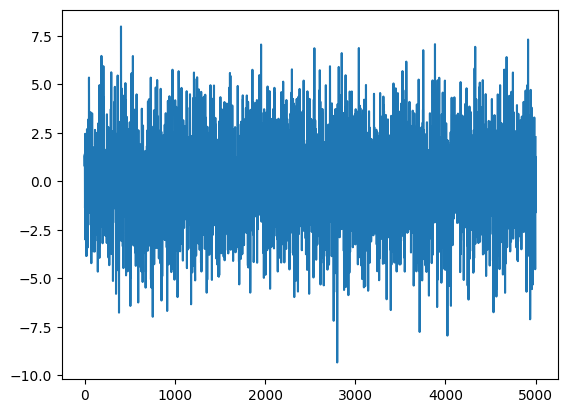

In [116]:
plt.plot(ns, sample_clean)
plt.show()

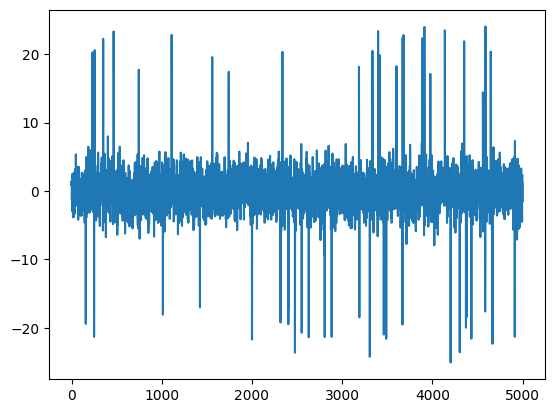

In [117]:
plt.plot(ns, sample_noisy)
plt.show()

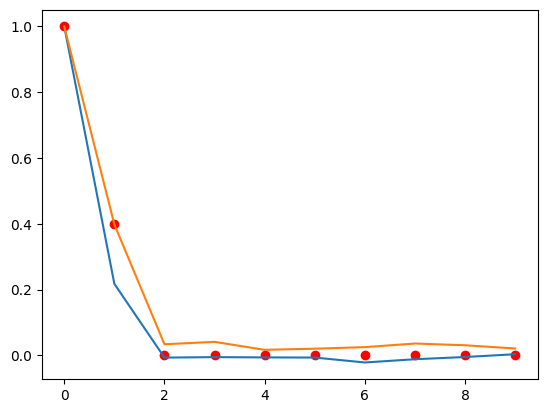

In [118]:
plt.plot(hs, teo_acfs, "ro")
plt.plot(hs, emp_acfs1_clean)
plt.plot(hs, emp_afcs2_clean)
plt.show()

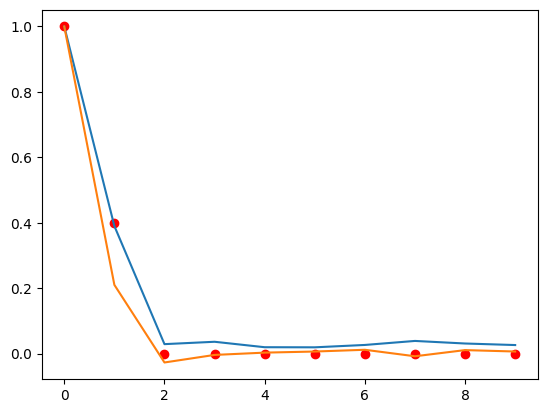

In [119]:
plt.plot(hs, teo_acfs, "ro")
plt.plot(hs, emp_acfs2_noisy)
plt.plot(hs, emp_afcs1_noisy)
plt.show()

In [ ]:
def trimmed_acf(X, h, alpha=0.1):
    n = len(X)
    x_mean = np.mean(X)
    reszty = (X[:n - h] - x_mean) * (X[h:] - x_mean)
    trimmed = np.sort(reszty)[int(alpha * len(reszty)) : int((1 - alpha) * len(reszty))]
    trimmed_h = np.mean(trimmed) 
    reszty_0 = (X - x_mean) ** 2
    trimmed_0 = np.sort(reszty_0)[int(alpha * len(reszty_0)) : int((1 - alpha) * len(reszty_0))]
    trimmed_0_mean = np.mean(trimmed_0)
    
    return trimmed_h / trimmed_0_mean